# Predicting Movie Box Office Revenue

# Importing the modules and library in python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk, messagebox
from tabulate import tabulate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Loading Movie DATASET

In [2]:
# Dataset loading
df = pd.read_csv('movie_dataset.csv')

# Data Preprocessing

In [3]:
# Data Preprocessing
selected_features = ['Movie Name','Release Period','Whether Remake','Whether Franchise','Genre','New Actor','New Director',
                     'New Music Director','Lead Star','Director','Music Director','Number of Screens','Revenue(INR)',
                     'Budget(INR)']

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values in the selected columns
print(df[selected_features].isnull().sum())

# Select the specified columns
df = df[selected_features]

# Handling missing values (if any)
df.dropna(inplace=True)

Movie Name            0
Release Period        0
Whether Remake        0
Whether Franchise     0
Genre                 0
New Actor             0
New Director          0
New Music Director    0
Lead Star             0
Director              0
Music Director        0
Number of Screens     0
Revenue(INR)          0
Budget(INR)           0
dtype: int64


# Shape of Movie Dataset

In [4]:
# Print the shape of the entire dataset
# Print the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
# Print the first 10 rows of the dataset

# Print the first 10 rows of the dataset in a tabular format
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


Number of rows: 1698
Number of columns: 14
+---+-------------------------+----------------+----------------+-------------------+----------+-----------+--------------+--------------------+------------------+-----------------+------------------------+-------------------+--------------+-------------+
|   |       Movie Name        | Release Period | Whether Remake | Whether Franchise |  Genre   | New Actor | New Director | New Music Director |    Lead Star     |    Director     |     Music Director     | Number of Screens | Revenue(INR) | Budget(INR) |
+---+-------------------------+----------------+----------------+-------------------+----------+-----------+--------------+--------------------+------------------+-----------------+------------------------+-------------------+--------------+-------------+
| 0 |       Golden Boys       |     Normal     |       No       |        No         | suspense |    Yes    |      No      |         No         |   Jeet Goswami   |   Ravi Varma    |     Bab

# Printing Information of Dataset such as Datatype and Null/missing values

In [5]:
# Print data types and non-null counts for each column
print(df.info())

# Check for null values in the DataFrame
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie Name          1698 non-null   object
 1   Release Period      1698 non-null   object
 2   Whether Remake      1698 non-null   object
 3   Whether Franchise   1698 non-null   object
 4   Genre               1698 non-null   object
 5   New Actor           1698 non-null   object
 6   New Director        1698 non-null   object
 7   New Music Director  1698 non-null   object
 8   Lead Star           1698 non-null   object
 9   Director            1698 non-null   object
 10  Music Director      1698 non-null   object
 11  Number of Screens   1698 non-null   int64 
 12  Revenue(INR)        1698 non-null   int64 
 13  Budget(INR)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB
None
Movie Name            0
Release Period        0
Whether Remake     

# Splitting the Dataset into Training & Testing

In [6]:
# Train-Test Split
X = df.drop('Revenue(INR)', axis=1)
y = df['Revenue(INR)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Shape of Training and Testing dataset of Movie Dataset

In [7]:
# Print the shape of the training and testing data
print("Total Data - ", X.shape)
print("Training Data - X shape:", X_train.shape)
print("Testing Data - X shape:", X_test.shape)

Total Data -  (1698, 13)
Training Data - X shape: (1188, 13)
Testing Data - X shape: (510, 13)


# Training the model RandomForestRegressor and plotting the graph between Actual Revenue and Predicted revenue.

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 8, 9, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


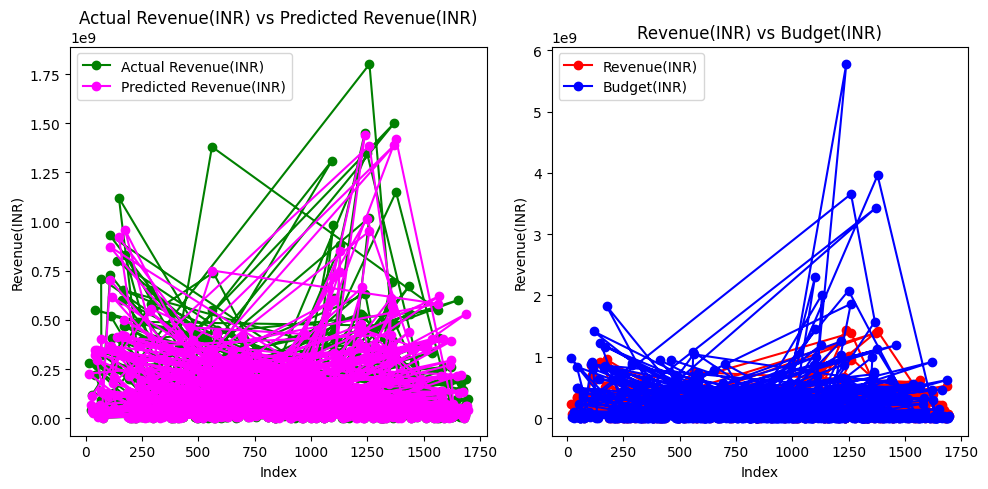

In [8]:

# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a column transformer for one-hot encoding
categorical_columns = ['Movie Name', 'Release Period', 'Whether Remake', 'Whether Franchise', 'Genre', 'New Actor', 'New Director',
                         'New Music Director', 'Lead Star', 'Director', 'Music Director']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the column transformer and random forest regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plotting Actual vs. Predicted Revenue
plt.figure(figsize=(10, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, position 1)
plt.title("Actual Revenue(INR) vs Predicted Revenue(INR)")
plt.plot(y_test.index, y_test.values, label='Actual Revenue(INR)', marker='o', color='green')
plt.plot(y_test.index, y_test_pred, label='Predicted Revenue(INR)', marker='o', color='magenta')
plt.xlabel("Index")
plt.ylabel("Revenue(INR)")
plt.legend()

# Assuming X_test is the testing data and 'Budget(INR)' is a feature in X_test
budget_values = X_test['Budget(INR)']

# Plotting Revenue vs Budget
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, position 2)
plt.title("Revenue(INR) vs Budget(INR)")
plt.plot(y_test.index, y_test_pred, label='Revenue(INR)', marker='o', color='red')
plt.plot(y_test.index, budget_values, label='Budget(INR)', marker='o', color='blue')
plt.xlabel("Index")
plt.ylabel("Revenue(INR)")
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Actual Revenue: This line represents the actual revenue values from your testing dataset.
# Predicted Revenue: This line represents the revenue values predicted by your model for the testing dataset.
# Budget: This line represents the 'Budget(INR)' values from your testing dataset.
# Index: In this context, the index refers to the row number or index of the data points in your testing dataset. It's used to plot the values against the corresponding indices.


# Accuracy calculation

In [9]:
# Assuming y_test and y_test_pred are your actual and predicted values
r2 = r2_score(y_test, y_test_pred)

# Convert R² to percentage
accuracy_percentage = r2 * 100

print(f"R-squared (Accuracy) in Percentage: {accuracy_percentage:.2f}%")

R-squared (Accuracy) in Percentage: 86.68%


# Graph of Genre vs Revenue(INR)

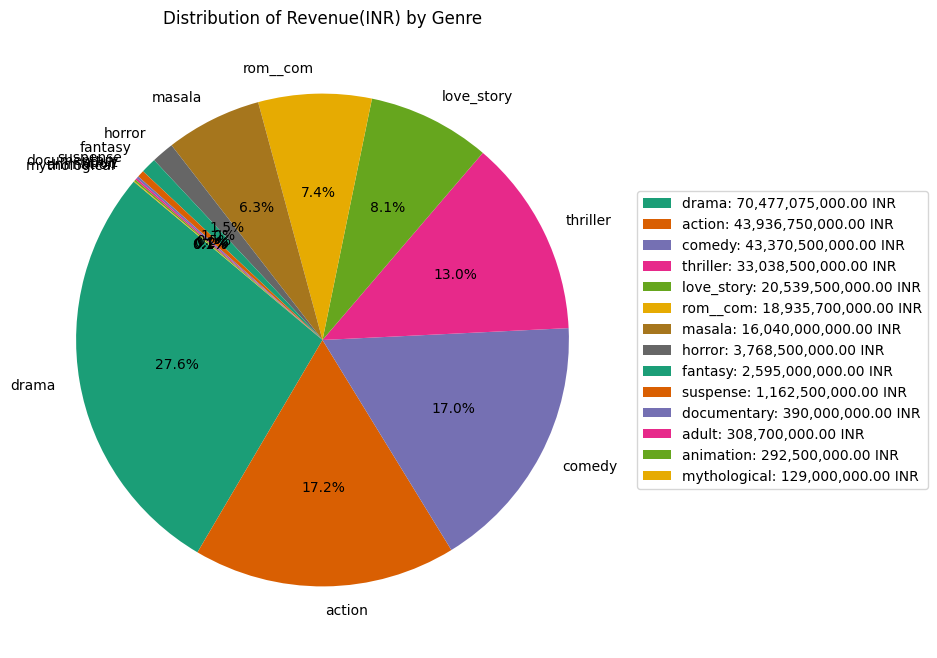

In [10]:
# Group by Genre and calculate the total revenue for each genre
genre_revenue_sum = df.groupby('Genre')['Revenue(INR)'].sum().sort_values(ascending=False)

# Choose darker colors for the pie chart
colors = plt.cm.Dark2.colors

# Plotting the pie chart
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(genre_revenue_sum, labels=genre_revenue_sum.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Create legend entries with genre and revenue information
legend_labels = [f"{genre}: {revenue:,.2f} INR" for genre, revenue in zip(genre_revenue_sum.index, genre_revenue_sum)]

# Add legend with custom legend labels
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Revenue(INR) by Genre')
plt.show()

# GUI Window

In [11]:
class MovieRevenuePredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Movie Revenue Prediction")
        self.root.configure(bg="#092635")

        # Create a frame at the top
        title_frame = Frame(root, bg="#092635")
        title_frame.grid(row=0, column=0, columnspan=3, sticky="ew")

        # Add the title to the frame
        title_label = Label(title_frame, text="Movie Revenue Prediciton", font=("Times New Roman", 20,"bold"), fg="white", bg="#092635")
        title_label.pack(pady=10)

        # GUI component
        self.lead_star_var = StringVar()
        self.selected_movie_var = StringVar()
        self.num_screens_var = StringVar()
        
        # Load the machine learning model
        self.model = model  # Use the previously defined model
        
        # Lead Star Analysis Section
        Label(root, text="Select Lead Star:", font=("Times New Roman",15,"bold"), width=20,bg="#1B4242",fg="white").grid(row=1, column=0, padx=10, pady=10)
        self.lead_star_dropdown = ttk.Combobox(root, textvariable=self.lead_star_var,
                                               values=df['Lead Star'].unique().tolist(), width=30)
        self.lead_star_dropdown.grid(row=1, column=1, padx=10, pady=10)
        Button(root, text="Analyze Lead Star", command=self.analyze_lead_star, width=20,font=("Times New Roman",15,"bold"), bg="#1B4242",fg="white").grid(row=1, column=2, padx=10, pady=10)
        
        # Movie Prediction Section
        Label(root, text="Select Movie:",font=("Times New Roman",15,"bold"),width=20, bg="#5C8374",fg="black").grid(row=2, column=0, padx=10, pady=10)
        self.movie_dropdown = ttk.Combobox(root, textvariable=self.selected_movie_var,
                                           values=df['Movie Name'].unique().tolist(),width=30)
        self.movie_dropdown.grid(row=2, column=1, padx=10, pady=10)
        Button(root, text="Calculate Revenue", command=self.calculate_revenue, width=20,font=("Times New Roman",15,"bold"),bg="#5C8374",fg="black").grid(row=2, column=2, padx=10, pady=10)
        
        # Number of Screens Section
        Label(root, text="Number of Screens:", font=("Times New Roman",15,"bold"), width=20,bg="#9EC8B9",fg="black").grid(row=3, column=0, padx=10, pady=10)
        self.num_screens_dropdown = ttk.Combobox(root, textvariable=self.num_screens_var,
                                                  values=df['Number of Screens'].unique().tolist(),width=30)
        self.num_screens_dropdown.grid(row=3, column=1, padx=10, pady=10)
        Button(root, text="Predict Revenue", command=self.predict_revenue,width=20,font=("Times New Roman",15,"bold"), bg="#9EC8B9",fg="black").grid(row=3, column=2, padx=10, pady=10)

    def analyze_lead_star(self):
        selected_lead_star = self.lead_star_var.get()

        # Query your dataset to get the number of movies done by the selected lead star
        num_movies = df[df['Lead Star'] == selected_lead_star].shape[0]
        messagebox.showinfo("Lead Star Analysis", f"{selected_lead_star} has done {num_movies} movies.")

        # Plot the lead star vs. revenue scatter plot
        self.plot_lead_star_graph(selected_lead_star)
    
    def plot_lead_star_graph(self, lead_star):
        # Filter dataset for the selected lead star
        lead_star_df = df[df['Lead Star'] == lead_star]

        # Plot the graph
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot the scatter plot for Revenue vs. Lead Star
        scatter = ax.scatter(lead_star_df['Movie Name'], lead_star_df['Revenue(INR)'], label='Revenue', color='green')

        # Annotate each marker with the actual revenue value on the right side
        for i, (x, y) in enumerate(zip(lead_star_df['Movie Name'], lead_star_df['Revenue(INR)'])):
            ax.annotate(f'{y:,.2f}', (x, y), textcoords="offset points", xytext=(5, 0), ha='left', color='black',
                        fontsize=10)

        ax.set_xlabel('Movie Name')
        ax.set_ylabel('Revenue(INR)')
        ax.set_title(f'Revenue Generated by {lead_star}')
        ax.legend()

        # Embed the plot in Tkinter window
        self.display_graph_window(fig)

    def calculate_revenue(self):
        selected_movie = self.selected_movie_var.get()

        # Check if the selected movie exists in the dataset
        if selected_movie in df['Movie Name'].values:
            # Query your dataset to get revenue and genre of the selected movie
            movie_data = df[df['Movie Name'] == selected_movie].iloc[0]
            revenue = movie_data['Revenue(INR)']
            genre = movie_data['Genre']
            screenNumber = movie_data['Number of Screens']

            messagebox.showinfo("Revenue Prediction", f"Movie Name: {selected_movie}\nRevenue Generated: {revenue:,.2f} INR \nGenre: {genre}\nNumber of Screens: {screenNumber}")    
        else:
            messagebox.showwarning("Movie Not Found", f"The selected movie '{selected_movie}' was not found in the dataset.")

    def predict_revenue(self):
        selected_num_screens = int(self.num_screens_var.get())  # Convert to int

        # Check if the selected number of screens exists in the dataset
        if selected_num_screens in df['Number of Screens'].values:
            # Query your dataset to get the actual and predicted revenue based on the selected number of screens
            revenue_data = df[df['Number of Screens'] == selected_num_screens]
            actual_revenue = revenue_data['Revenue(INR)'].sum()
        
            # Prepare features for prediction
            features_for_prediction = revenue_data.drop('Revenue(INR)', axis=1)
            
            # Use the pre-trained model to make predictions
            predicted_revenue = self.model.predict(features_for_prediction)

            # Get the names of movies associated with the selected number of screens
            movie_names = revenue_data['Movie Name'].tolist()

            # Display messagebox with details
            messagebox.showinfo("Revenue Calculation",f"Actual Revenue: {actual_revenue:,.2f} INR\n\nPredicted Revenue: {predicted_revenue.sum():,.2f} INR\n\nMovies: {', '.join(movie_names)}")
        else:
            messagebox.showwarning("Number of Screens Not Found",f"The selected number of screens '{selected_num_screens}' was not found in the dataset.")

    def display_graph_window(self, fig):
        # Create a new window for the graph
        graph_window = Toplevel(self.root)
        graph_window.title("Revenue Graph")
        graph_window.configure(bg="lightpink")

        # Embed the plot in the new window
        canvas = FigureCanvasTkAgg(fig, master=graph_window)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()

root = Tk()
movieApp = MovieRevenuePredictionApp(root)
root.mainloop()